#Делаю импорт библиотек

In [5]:

from sklearn.model_selection  import cross_val_score
from sklearn  import datasets
from sklearn  import metrics
from sklearn  import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Создаю переменную и загружаю в нее датасет, в переменную Х я записываю матрицу признаков, а в y ответы

In [6]:
digits = datasets.load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [7]:
X = digits.data
y = digits.target

Разделяю данные на тестовые и тренировачные , построил модель дерева и обучил ее


In [16]:
train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [17]:
LilGhoul = tree.DecisionTreeClassifier()


In [18]:
LilGhoul.fit(train_data, train_labels)

DecisionTreeClassifier()

Вывожу оценку качества с кроссвалидацией


In [22]:
cv = cross_val_score(LilGhoul, X, y, cv=10)
cv 

array([0.80555556, 0.82222222, 0.82222222, 0.81666667, 0.80555556,
       0.87222222, 0.88888889, 0.83798883, 0.82122905, 0.81564246])

In [23]:
cv.mean()


0.8308193668528864

выполнил визуализацию дерева решений 

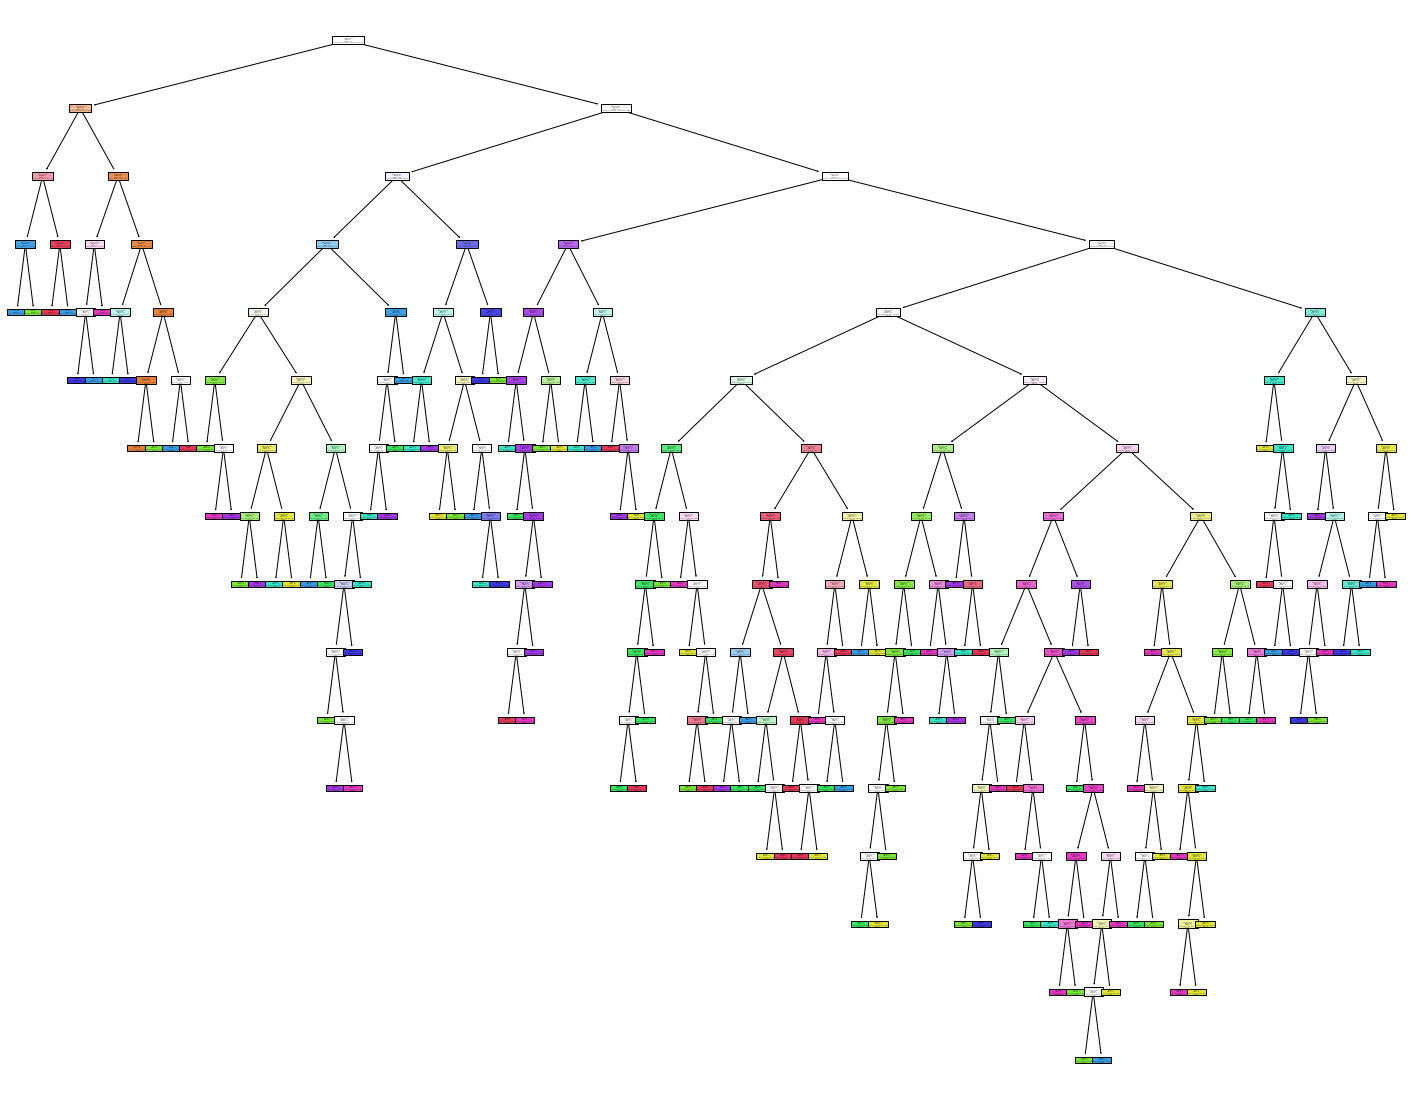

In [26]:
fig = plt.figure(figsize = (25,20))
_ = tree.plot_tree(LilGhoul,
                   feature_names=['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
  'pixel_5_2',
  'pixel_5_3',
  'pixel_5_4',
  'pixel_5_5',
  'pixel_5_6',
  'pixel_5_7',
  'pixel_6_0',
  'pixel_6_1',
  'pixel_6_2',
  'pixel_6_3',
  'pixel_6_4',
  'pixel_6_5',
  'pixel_6_6',
  'pixel_6_7',
  'pixel_7_0',
  'pixel_7_1',
  'pixel_7_2',
  'pixel_7_3',
  'pixel_7_4',
  'pixel_7_5',
  'pixel_7_6',
  'pixel_7_7'],
                   class_names=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'],
                   filled=True)


Установил параметры критерий gini - это качества раскола, следом splitter будет случайным и глубина дерева 10. Изменение параметров не улучшает качества классификаций. 

In [43]:
tree_crit = tree.DecisionTreeClassifier(criterion = "gini", splitter = "random", max_depth = 10)
tree_crit.fit(train_data, train_labels)
cv_10 = cross_val_score(tree_crit, X, y, cv=10)
print(np.mean(cv_10))

0.8241558038485414


Строю модель, обучаю ее после оцениваю качества. Метод ближаших соседей показал лучший результат 

In [47]:
from sklearn.neighbors import KNeighborsClassifier
LilGhoul2 = KNeighborsClassifier(n_neighbors=3)


In [48]:
LilGhoul2.fit(train_data, train_labels)
cv1 = cross_val_score(LilGhoul2, X, y, cv=10)
print(np.mean(cv1))

0.9766325263811299
